In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

x = [1, 2, 2, 3, 6, 7]
y = [1.4, 1.3, 6.4, 6.1, 3.2, 3.5]
x = np.array(x, dtype=np.float64)
y = np.array(y, dtype=np.float64)

Text(0, 0.5, 'Y-axis')

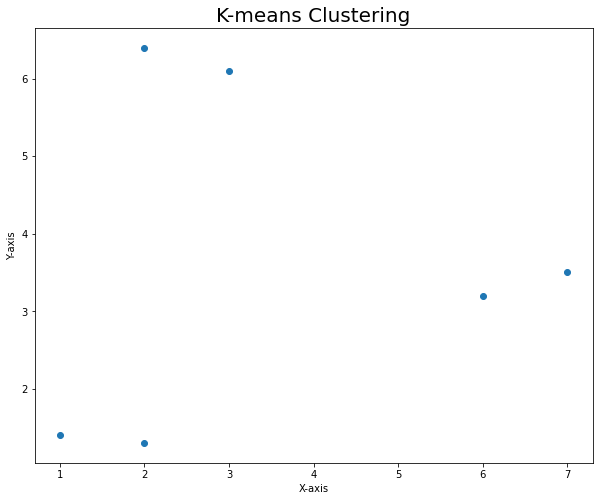

In [14]:
plt.ion()

figure, ax = plt.subplots(figsize=(10, 8))
dot1 = ax.scatter(x, y)

plt.title("K-means Clustering", fontsize=20)

plt.xlabel("X-axis")
plt.ylabel("Y-axis")

In [29]:
k = 3

In [47]:
random_centers = np.random.rand(k, 2)

random_centers = random_centers
random_p = np.array([[np.random.randint(min(x), max(x)) for _ in range(2)], [np.random.randint(min(y), max(y)) for _ in range(2)]])

random_centers = random_centers@random_p.T

In [95]:
def euclidean_distance(x1, y1, x2, y2):
    return np.sqrt((x1 - x2)**2+(y1 - y2)**2)

nb_epochs = 100

for epoch in range(nb_epochs):
    points = {}

    for i in range(k):
        points[str(i)] = []

    for xi, yi in zip(x, y):
        distances_from_center = np.array([euclidean_distance(xi, yi, xii, yii) for xii, yii in random_centers])
        t_index = np.argmin(distances_from_center)

        points[str(t_index)].append((xi, yi))


    for i in range(k):
        cluster_points = points[str(i)]

        if (len(cluster_points) == 0):
            continue 

        new_center = np.sum(cluster_points, axis=0)/len(cluster_points[0])

        # if (new_center == random_centers[i]).all():
            # print("finish!!")
        # else:
        random_centers[i] = new_center
    
print(points)
print(random_centers)

{'0': [(1.0, 1.4), (2.0, 1.3), (2.0, 6.4), (3.0, 6.1), (6.0, 3.2), (7.0, 3.5)], '1': [], '2': []}
[[10.5  10.95]
 [10.5  10.95]
 [10.5  10.95]]


잘 작동하지 않는다... 내 생각에는 군집화하는 중점의 좌표를 랜덤으로 설정하고 있어서 시간이 지날수록 모든 중심이 같아지는 현상이 일어나는 것 같다.